In [28]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-11-04 07:58:34--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.210.138, 173.194.210.101, 173.194.210.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-04 07:58:34--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.07s   

2025-11-04 07

In [14]:
pip install adtk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adtk.data import validate_series
from adtk.detector import ThresholdAD, QuantileAD, SeasonalAD, LevelShiftAD, VolatilityShiftAD
from adtk.visualization import plot

# 建置模擬數據

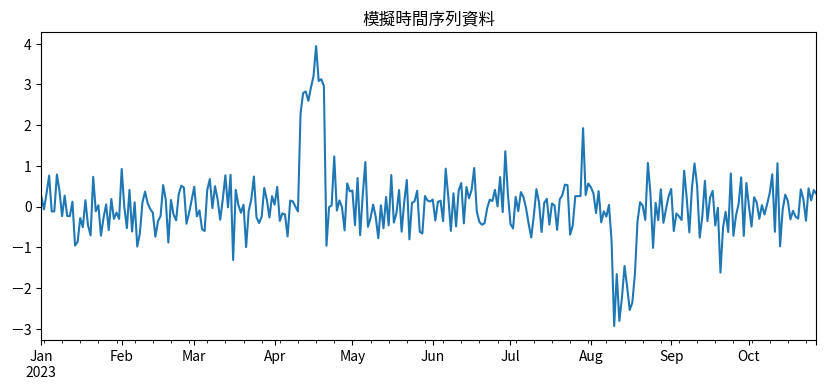

In [16]:
np.random.seed(42)
index = pd.date_range("2023-01-01", periods=300, freq="D")
values = np.random.normal(0, 0.5, size=300)
values[100:110] += 3  # 模擬突發異常
values[220:230] -= 2  # 模擬下降異常

series = pd.Series(values, index=index)
series = validate_series(series)
series.plot(title="模擬時間序列資料", figsize=(10, 4))
plt.show()

# 基本異常偵測模型1️⃣ 閾值偵測（ThresholdAD）

超出指定上下限的值即判定為異常。

適合簡單、規則明確的數據流。

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38334 (\N{CJK UNIFIED IDEOGRAPH-95BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas

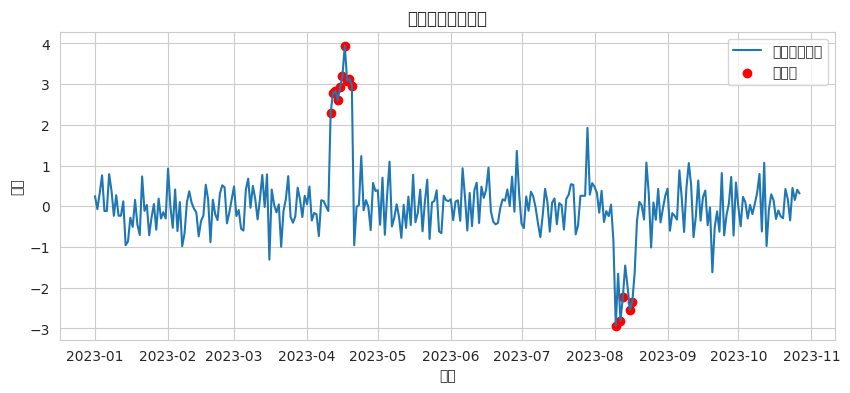

In [24]:
# 改用 matplotlib 繪製結果
plt.figure(figsize=(10, 4))
plt.plot(series.index, series.values, label='時間序列資料')
plt.scatter(anomalies_threshold.index[anomalies_threshold], series[anomalies_threshold], color='red', label='異常點')
plt.title("閾值異常偵測結果")
plt.xlabel("日期")
plt.ylabel("數值")
plt.legend()
plt.grid(True)
plt.show()

# 基本異常偵測模型2️⃣ 分位數偵測（QuantileAD）

根據數據分布自動決定上下界。

適合長期穩定資料但偶有異常尖峰的情境。

In [29]:
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies_quantile = quantile_ad.fit_detect(series)

# 基本異常偵測模型 3️⃣ 季節性異常偵測（SeasonalAD）

說明：

透過分解週期行為偵測偏離模式的點。

適合天氣、銷售、能源需求等週期型資料。

In [31]:
# 模擬週期性資料
index = pd.date_range("2023-01-01", periods=300, freq="D")
values = np.sin(np.linspace(0, 10 * np.pi, 300)) + np.random.normal(0, 0.2, 300)
values[150] += 3  # 插入異常
series2 = pd.Series(values, index=index)

seasonal_ad = SeasonalAD(freq=30)
anomalies_seasonal = seasonal_ad.fit_detect(series2)

# 基本異常偵測模型 4️⃣ 水平變化偵測（LevelShiftAD）

📘 說明：

用於偵測平均值的突然變化。

適合「系統性偏移」如設備故障、感測器偏移。



In [35]:
levelshift_ad = LevelShiftAD(c=6.0, side='both', window=10)
anomalies_levelshift = levelshift_ad.fit_detect(series)

/usr/local/lib/python3.12/dist-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.12/dist-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.12/dist-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().any(axis=1)] = 

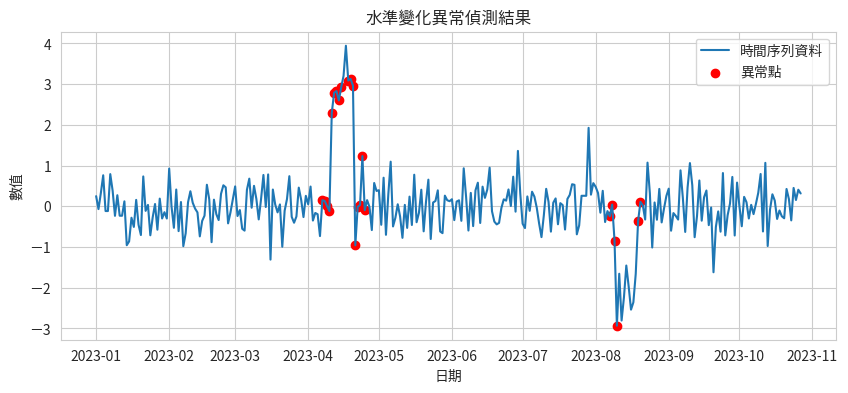

In [40]:
# 改用 matplotlib 繪製結果
plt.figure(figsize=(10, 4))
plt.plot(series.index, series.values, label='時間序列資料')

# 過濾掉 anomalies_levelshift 中的 NaN 值，只保留布林值
anomalies_levelshift_filtered = anomalies_levelshift.dropna().astype(bool)

plt.scatter(anomalies_levelshift_filtered.index[anomalies_levelshift_filtered], series[anomalies_levelshift_filtered], color='red', label='異常點')
plt.title("水準變化異常偵測結果")
plt.xlabel("日期")
plt.ylabel("數值")
plt.legend()
plt.grid(True)
plt.show()

基本異常偵測模型 5️⃣ 波動變化偵測（VolatilityShiftAD）

📘 說明：

偵測波動度（變異）突然增大或縮小的情況。

適用於金融市場波動、網路流量突變。

In [41]:
volatility_ad = VolatilityShiftAD(window=20, c=2.0)
anomalies_volatility = volatility_ad.fit_detect(series)

/usr/local/lib/python3.12/dist-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.12/dist-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.12/dist-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().any(axis=1)] = 

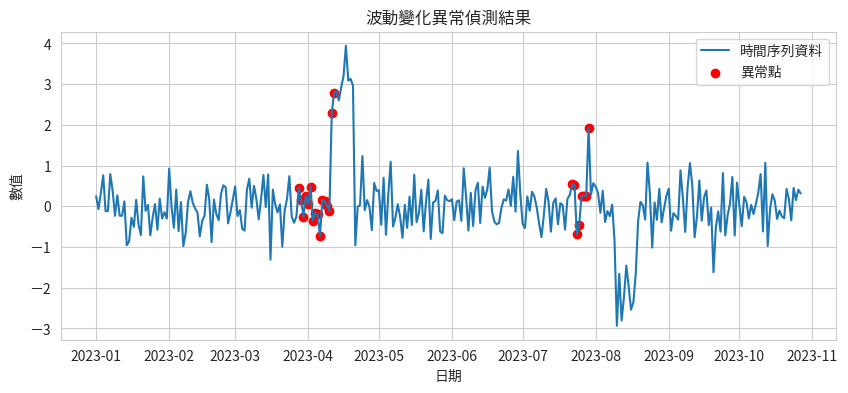

In [45]:
# 改用 matplotlib 繪製結果
plt.figure(figsize=(10, 4))
plt.plot(series.index, series.values, label='時間序列資料')
plt.scatter(anomalies_volatility.index[anomalies_volatility], series[anomalies_volatility], color='red', label='異常點')
plt.title("波動變化異常偵測結果")
plt.xlabel("日期")
plt.ylabel("數值")
plt.legend()
plt.grid(True)
plt.show()

🧮 五、組合偵測器（Composite Pipeline）

說明：

可先平滑化（rolling mean），再進行異常判定。

提升穩定性、降低假警報率。

In [46]:
from adtk.pipe import Pipeline
from adtk.transformer import RollingAggregate

pipeline = Pipeline([
    ("roll_mean", RollingAggregate(agg='mean', window=10)),
    ("detector", QuantileAD(high=0.98, low=0.02))
])

anomalies_pipeline = pipeline.fit_detect(series)

/usr/local/lib/python3.12/dist-packages/adtk/detector/_detector_1d.py:197: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan


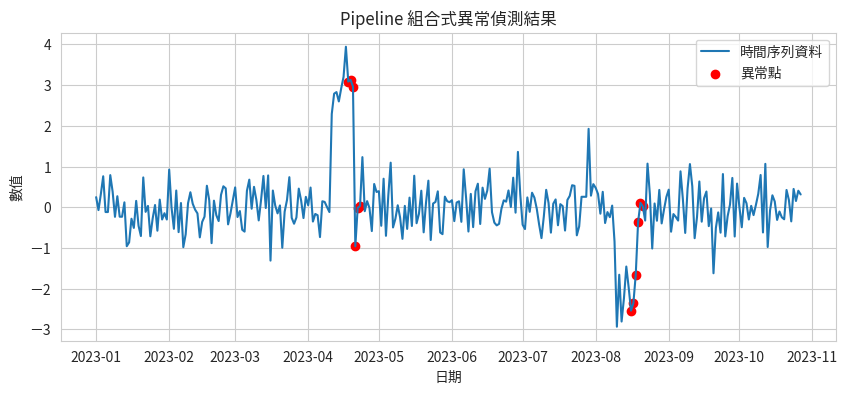

In [49]:
# 改用 matplotlib 繪製結果
plt.figure(figsize=(10, 4))
plt.plot(series.index, series.values, label='時間序列資料')

# 過濾掉 anomalies_pipeline 中的 NaN 值，只保留布林值
anomalies_pipeline_filtered = anomalies_pipeline.dropna()

# 使用原始 series 的索引和過濾後的布林值來選取異常點
anomalies_indices = anomalies_pipeline_filtered[anomalies_pipeline_filtered].index
plt.scatter(anomalies_indices, series[anomalies_indices], color='red', label='異常點')

plt.title("Pipeline 組合式異常偵測結果")
plt.xlabel("日期")
plt.ylabel("數值")
plt.legend()
plt.grid(True)
plt.show()